In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import copy


In [2]:
data = pd.read_csv('TSLA.csv')


In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-04-11,53.660000,54.099998,53.119999,53.683998,49179500,0,0.0
1,2019-04-12,54.043999,54.389999,53.366001,53.540001,33730000,0,0.0
2,2019-04-15,53.726002,53.776001,51.726002,53.276001,50193000,0,0.0
3,2019-04-16,53.150002,55.000000,52.944000,54.672001,36364500,0,0.0
4,2019-04-17,54.950001,54.958000,53.708000,54.245998,25632500,0,0.0


In [4]:
# 最后两列没用，去掉
data = data.iloc[:,:6]
base_data = copy.deepcopy(data)

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2019-04-11,53.660000,54.099998,53.119999,53.683998,49179500
1,2019-04-12,54.043999,54.389999,53.366001,53.540001,33730000
2,2019-04-15,53.726002,53.776001,51.726002,53.276001,50193000
3,2019-04-16,53.150002,55.000000,52.944000,54.672001,36364500
4,2019-04-17,54.950001,54.958000,53.708000,54.245998,25632500


In [6]:
data['Date'] = pd.to_datetime(data['Date'])


In [7]:
train_data = data[:-22]
test_data = data[-22:]

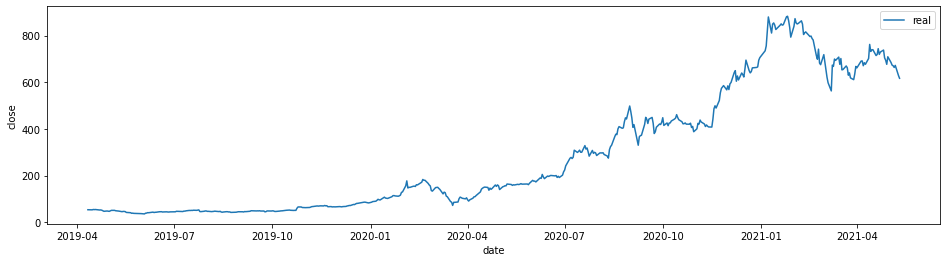

In [8]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(data['Date'], data['Close'], label='real')


plt.legend(loc='upper right')
plt.savefig("close.png",dpi=200)
plt.show()

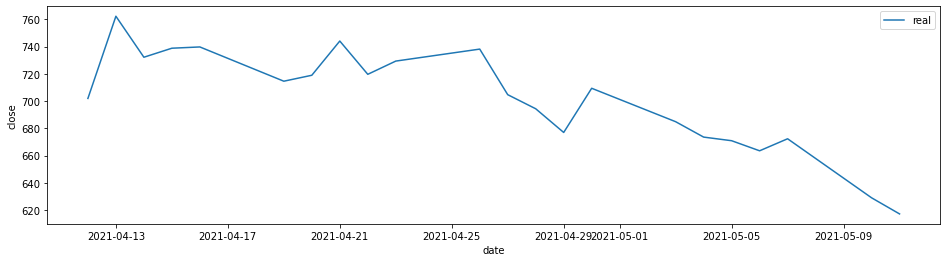

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(test_data['Date'], test_data['Close'], label='real')


plt.legend(loc='upper right')
plt.savefig("last_month_close.png",dpi=200)
plt.show()

In [10]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2019-04-11,53.660000,54.099998,53.119999,53.683998,49179500
1,2019-04-12,54.043999,54.389999,53.366001,53.540001,33730000
2,2019-04-15,53.726002,53.776001,51.726002,53.276001,50193000
3,2019-04-16,53.150002,55.000000,52.944000,54.672001,36364500
4,2019-04-17,54.950001,54.958000,53.708000,54.245998,25632500


In [46]:
date_list = list(data['Date'])
date_list

[Timestamp('2019-04-11 00:00:00'),
 Timestamp('2019-04-12 00:00:00'),
 Timestamp('2019-04-15 00:00:00'),
 Timestamp('2019-04-16 00:00:00'),
 Timestamp('2019-04-17 00:00:00'),
 Timestamp('2019-04-18 00:00:00'),
 Timestamp('2019-04-22 00:00:00'),
 Timestamp('2019-04-23 00:00:00'),
 Timestamp('2019-04-24 00:00:00'),
 Timestamp('2019-04-25 00:00:00'),
 Timestamp('2019-04-26 00:00:00'),
 Timestamp('2019-04-29 00:00:00'),
 Timestamp('2019-04-30 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-05-02 00:00:00'),
 Timestamp('2019-05-03 00:00:00'),
 Timestamp('2019-05-06 00:00:00'),
 Timestamp('2019-05-07 00:00:00'),
 Timestamp('2019-05-08 00:00:00'),
 Timestamp('2019-05-09 00:00:00'),
 Timestamp('2019-05-10 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-05-14 00:00:00'),
 Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-05-16 00:00:00'),
 Timestamp('2019-05-17 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-21 00:00:00'),
 Timestamp('2019-05-

In [12]:
close_list = list(data['Close'])

In [44]:
X = list()
y = list()
# 前5条作为x，第6条作为y
for i in range(len(close_list) - 5):
    X.append(close_list[i:i+5])
    y.append(close_list[i+5])
X
y

[54.6520004272461,
 52.54999923706055,
 52.77999877929688,
 51.73199844360352,
 49.5260009765625,
 47.02799987792969,
 48.29399871826172,
 47.737998962402344,
 46.80199813842773,
 48.81999969482422,
 51.00600051879883,
 51.06800079345703,
 49.4119987487793,
 48.96799850463867,
 48.39599990844727,
 47.90399932861328,
 45.4020004272461,
 46.46200180053711,
 46.38999938964844,
 45.66600036621094,
 42.20600128173828,
 41.071998596191406,
 41.01599884033203,
 38.54600143432617,
 39.097999572753906,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.72000122070313,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 

In [45]:
#此时date_list需要-5，前面5天没有预测值
date_list = date_list[5:]
date_list

[Timestamp('2019-04-26 00:00:00'),
 Timestamp('2019-04-29 00:00:00'),
 Timestamp('2019-04-30 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-05-02 00:00:00'),
 Timestamp('2019-05-03 00:00:00'),
 Timestamp('2019-05-06 00:00:00'),
 Timestamp('2019-05-07 00:00:00'),
 Timestamp('2019-05-08 00:00:00'),
 Timestamp('2019-05-09 00:00:00'),
 Timestamp('2019-05-10 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-05-14 00:00:00'),
 Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-05-16 00:00:00'),
 Timestamp('2019-05-17 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-21 00:00:00'),
 Timestamp('2019-05-22 00:00:00'),
 Timestamp('2019-05-23 00:00:00'),
 Timestamp('2019-05-24 00:00:00'),
 Timestamp('2019-05-28 00:00:00'),
 Timestamp('2019-05-29 00:00:00'),
 Timestamp('2019-05-30 00:00:00'),
 Timestamp('2019-05-31 00:00:00'),
 Timestamp('2019-06-03 00:00:00'),
 Timestamp('2019-06-04 00:00:00'),
 Timestamp('2019-06-05 00:00:00'),
 Timestamp('2019-06-

In [15]:
# 因为数据量太小，所以只使用最后22个交易日作为测试集（差不多一个月），倒数50到倒数22个交易日的数据作为验证集
test_data = data[-22:]
valid_data = data[-50:-22]
train_data = data[:-50]

In [16]:
# 提取训练集，验证集，测试集的close
y_train = y[:-50]
X_train = X[:-50]

y_valid = y[-50:-22]
X_valid = X[-50:-22]

y_test = y[-22:]
X_test = X[-22:]

In [17]:
# 提取date用于画图
train_date = date_list[:-50]
valid_date = date_list[-50:-22]
test_date  = date_list[-22:]


In [18]:
len(X)

520

In [19]:
# 转化为numpy向量
X_train = np.array(X_train)
y_train = np.array(y_train)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [20]:
# scaler
from sklearn import preprocessing

scaler_X = preprocessing.MinMaxScaler()

scaler_X.fit(X_train) 
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
X_valid = scaler_X.transform(X_valid)


# linear regression

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

In [23]:
# 查看mse
train_mse = metrics.mean_squared_error(y_train, train_predictions)
valid_mse = metrics.mean_squared_error(y_valid, valid_predictions) 
print("train mse: {} valid mse: {}".format(train_mse, valid_mse))

train mse: 214.83335512169288 valid mse: 1040.9228349683408


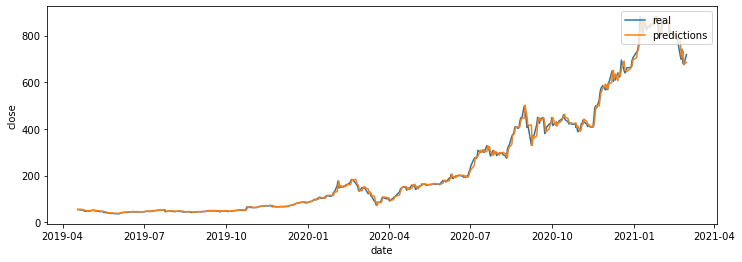

In [24]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(train_date, y_train, label='real')
plt.plot(train_date, train_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("train-predict-linear-scaler.png",dpi=200)
plt.show()

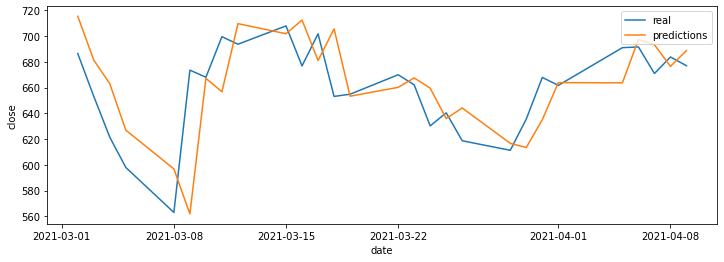

In [25]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(valid_date, y_valid, label='real')
plt.plot(valid_date, valid_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("valid-predict-linear-scaler.png",dpi=200)
plt.show()

In [26]:
test_predictions = model.predict(X_test)
test_mse = metrics.mean_squared_error(y_test, test_predictions)
print('test_mse: {}'.format(test_mse))

test_mse: 582.7203982655725


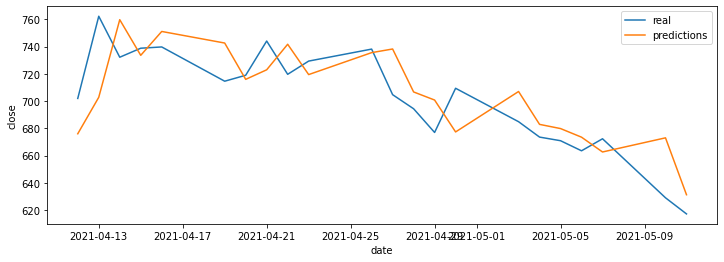

In [27]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(test_date, y_test, label='real')
plt.plot(test_date, test_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("test-predict-linear-scaler.png",dpi=200)
plt.show()

# 预测未来第90个交易日的股价


In [28]:
# 取测试集最后一个数据
x = X_test[-1]

In [29]:
# 循环预测
predict = list()
for i in range(90):
    p = model.predict([x])
    predict.append(p[0])
    # 预测值归一化，由于前面是5个数的， 所以这里也需要拼成5个数反归一化
    p = scaler_X.transform(np.array([p,p,p,p,p]).reshape(1,-1))[0][0]
    x = x[1:]
    x = list(x)
    x.append(p)
    x = np.array(x)
    

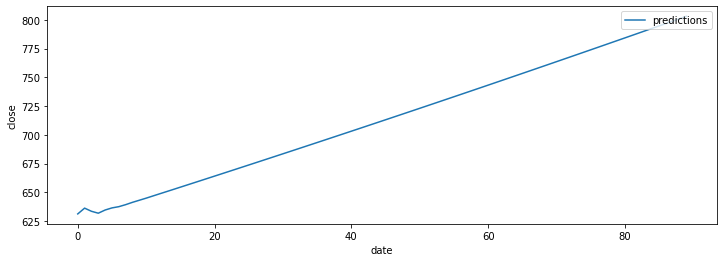

In [30]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(predict, label='predictions')


plt.legend(loc='upper right')
plt.savefig("predict_next_90_linear.png",dpi=200)
plt.show()

In [31]:
# 输出第90天的预测值
print(predict[-1])


803.0802441291901


# SGD regrerssion

In [32]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(random_state=6)
model.fit(X_train, y_train)

C:\Users\barry\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(random_state=6)

In [33]:
train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

In [34]:
# 查看mse
train_mse = metrics.mean_squared_error(y_train, train_predictions)
valid_mse = metrics.mean_squared_error(y_valid, valid_predictions) 
print("train mse: {} valid mse: {}".format(train_mse, valid_mse))


train mse: 390.2888663473348 valid mse: 1613.917742553556


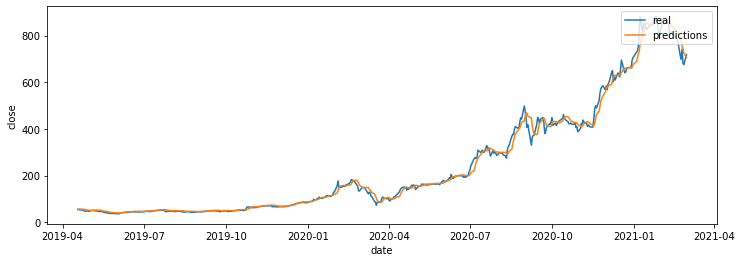

In [35]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(train_date, y_train, label='real')
plt.plot(train_date, train_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("train-predict-sgd-scaler.png",dpi=200)
plt.show()

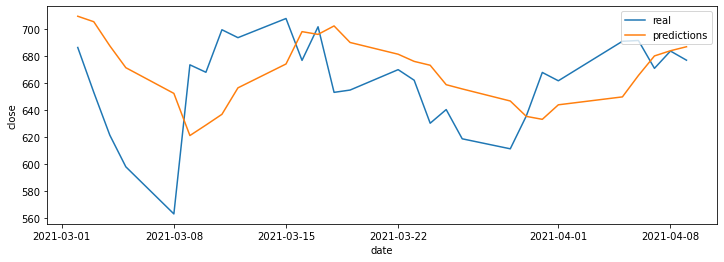

In [36]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(valid_date, y_valid, label='real')
plt.plot(valid_date, valid_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("valid-predict-sgd-scaler.png",dpi=200)
plt.show()

In [37]:
test_predictions = model.predict(X_test)
test_mse = metrics.mean_squared_error(y_test, test_predictions)
print('test_mse: {}'.format(test_mse))

test_mse: 875.0714380408924


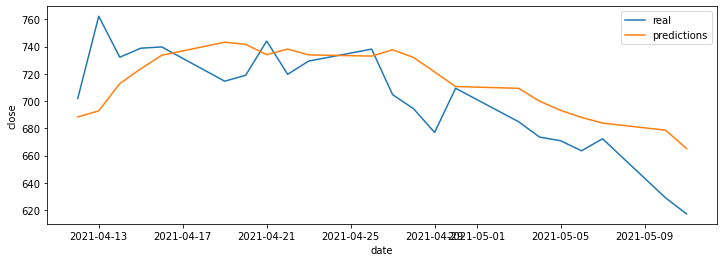

In [38]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(test_date, y_test, label='real')
plt.plot(test_date, test_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("test-predict-sgd-scaler.png",dpi=200)
plt.show()

# 预测未来第90个交易日的股价


In [39]:
# 取测试集最后一个数据
x = X_test[-1]

In [40]:
# 循环预测
predict = list()
for i in range(90):
    p = model.predict([x])
    predict.append(p[0])
    # 预测值归一化，由于前面是5个数的， 所以这里也需要拼成5个数反归一化
    p = scaler_X.transform(np.array([p,p,p,p,p]).reshape(1,-1))[0][0]
    x = x[1:]
    x = list(x)
    x.append(p)
    x = np.array(x)
    

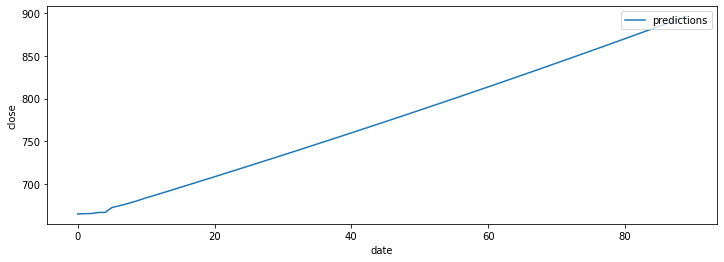

In [41]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(predict, label='predictions')


plt.legend(loc='upper right')
plt.savefig("predict_next_90_sgd.png",dpi=200)
plt.show()

In [42]:
# 输出第90天的预测值
print(predict[-1])


896.2761678036725
